In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

sys.path.insert(0, '/home/aew492/CFE_gradients/code')
import globals
globals.initialize_vals()
import generate_mock_list

In [14]:
# globals params
data_dir = globals.data_dir
nmocks = globals.rlzs
ncont = globals.ncont
randmult = globals.randmult

### CFE results for lognormal (no gradient): spread of amplitudes

In [15]:
# generate two classes of mocks
L = 750
n = '2e-4'
MockSet_ln = generate_mock_list.mock_set(L, n, As=1, rlzs=nmocks)
MockSet_m0 = generate_mock_list.mock_set(L, n, As=2, rlzs=nmocks)
MockSet_m0.add_gradient(grad_dim=2, m=0, b=0.5)

In [16]:
# load in binned results
MockSet_ln.load_xi_lss()
MockSet_m0.load_xi_lss()

In [17]:
r_avg = MockSet_ln.r_avg
ls_lns = MockSet_ln.xi_lss
ls_m0s = MockSet_m0.xi_lss

In [18]:
mean_ls_ln = np.mean(ls_lns, axis=0)
std_ls_ln = np.std(ls_lns, axis=0)
mean_ls_m0 = np.mean(ls_m0s, axis=0)
std_ls_m0 = np.std(ls_m0s, axis=0)

In [19]:
# load in CFE results
MockSet_ln.load_xi_cfes(bao_fixed=False)
MockSet_m0.load_xi_cfes(bao_fixed=False)

In [20]:
rcont = MockSet_ln.rcont
cfe_lns = MockSet_ln.xi_cfes
cfe_m0s = MockSet_m0.xi_cfes

In [21]:
mean_cfe_ln = np.mean(cfe_lns, axis=0)
std_cfe_ln = np.std(cfe_lns, axis=0)
mean_cfe_m0 = np.mean(cfe_m0s, axis=0)
std_cfe_m0 = np.std(cfe_m0s, axis=0)

In [22]:
err_bnds_ln = [mean_cfe_ln-std_cfe_ln, mean_cfe_ln+std_cfe_ln]
err_bnds_m0 = [mean_cfe_m0-std_cfe_m0, mean_cfe_m0+std_cfe_m0]

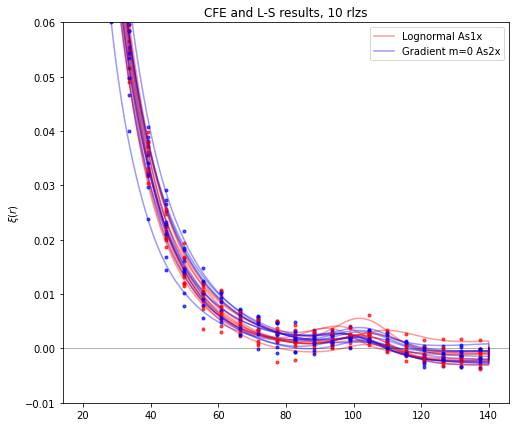

In [23]:
# plot a single realization
fig, ax = plt.subplots(figsize=(8,7))

c1 = 'r'
c2 = 'b'

nrlzs = 10

for i in range(nrlzs):
    label1 = 'Lognormal As1x' if i==0 else None
    label2 = 'Gradient m=0 As2x' if i==0 else None
    ax.plot(rcont, cfe_lns[i], color=c1, alpha=0.4, label=label1)
    ax.plot(rcont, cfe_m0s[i], color=c2, alpha=0.4, label=label2)

    ax.plot(r_avg, ls_lns[i], color=c1, marker='.', alpha=0.7, ls='None')
    ax.plot(r_avg, ls_m0s[i], color=c2, marker='.', alpha=0.7, ls='None')

ax.axhline(0, color='k', alpha=0.3, lw=1)

ax.set_ylim((-0.01, 0.06))
ax.set_ylabel(r"$\xi(r)$")
ax.set_title(f"CFE and L-S results, {nrlzs} rlzs")
ax.legend()

Text(0.5, 0.98, 'Spread of CFE amplitudes (401 rlzs, iterative BAO bases)')

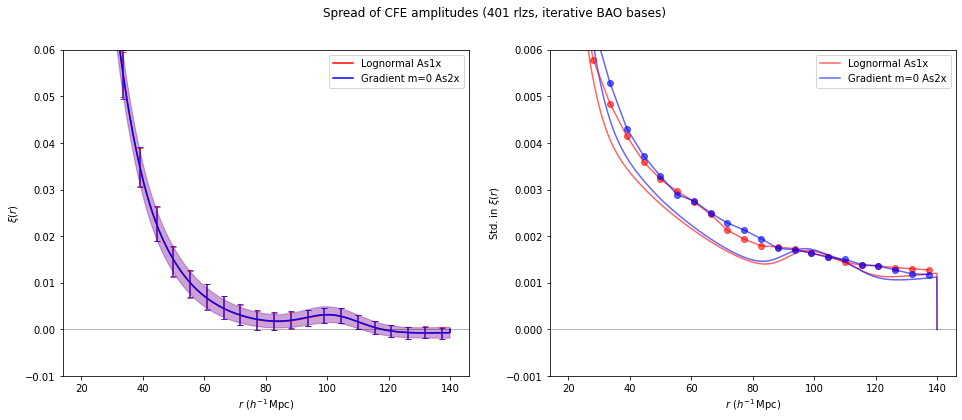

In [25]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(16,6))

c1 = 'r'
c2 = 'b'

ax0.plot(rcont, mean_cfe_ln, color=c1, label='Lognormal As1x')
ax0.fill_between(rcont, err_bnds_ln[0], err_bnds_ln[1], color=c1, alpha=0.2)

ax0.plot(rcont, mean_cfe_m0, color=c2, label='Gradient m=0 As2x')
ax0.fill_between(rcont, err_bnds_m0[0], err_bnds_m0[1], color=c2, alpha=0.2)

ax0.errorbar(r_avg, mean_ls_ln, std_ls_ln, color=c1, capsize=3, ls='None', alpha=0.7)
ax0.errorbar(r_avg, mean_ls_m0, std_ls_m0, color=c2, capsize=3, ls='None', alpha=0.7)

ax0.set_ylim((-0.01, 0.06))
ax0.set_ylabel(r"$\xi(r)$")

ax1.plot(rcont, std_cfe_ln, color=c1, alpha=0.6, label='Lognormal As1x')
ax1.plot(rcont, std_cfe_m0, color=c2, alpha=0.6, label='Gradient m=0 As2x')

ax1.plot(r_avg, std_ls_ln, color=c1, marker='o', alpha=0.6)
ax1.plot(r_avg, std_ls_m0, color=c2, marker='o', alpha=0.6)

ax1.set_ylim((-0.001, 0.006))
ax1.set_ylabel(r"Std. in $\xi(r)$")

for ax in [ax0, ax1]:
    ax.axhline(0, color='k', alpha=0.3, lw=1)
    ax.set_xlabel(r"$r$ ($h^{-1}\,$Mpc)")
    ax.legend()

fig.suptitle(f"Spread of CFE amplitudes ({MockSet_ln.nmocks} rlzs, iterative BAO bases)")